# Kritika Chauhan
## Task 4: Prediction using Decision Tree Algorithm

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

## Loading the data

In [2]:
df=pd.read_csv('Downloads\IRIS (1).csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualising the data

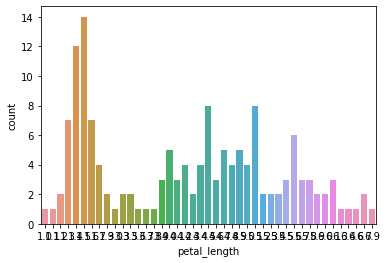

In [6]:
sns.countplot(x='petal_length',data=df)

## Building the decision tree classifier algorithm

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [8]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

## Splitting the data into training and testing datasets

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

## Splitting the data into validation and testing datasets

In [10]:
xt,xv,yt,yv=train_test_split(x_train,y_train,test_size=0.10,random_state=42)

In [11]:

model=DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(106.52727272727273, 199.32, 'X[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [36, 41, 35]'),
 Text(76.0909090909091, 163.07999999999998, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(136.96363636363637, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.497\nsamples = 76\nvalue = [0, 41, 35]'),
 Text(60.872727272727275, 126.83999999999999, 'X[2] <= 5.35\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(30.436363636363637, 90.6, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(91.30909090909091, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(213.05454545454546, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(152.1818181818182, 90.6, 'X[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(121.74545454545455, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(182.61818181818182, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(273.92727272727274, 90.6, 'X[

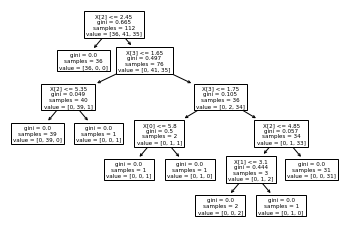

In [12]:
tree.plot_tree(model)

## Checking the accuracy

In [13]:
print(cross_val_score(model,xt,yt,cv=3,scoring='accuracy').mean())

0.98989898989899


## Checking the validation data

In [14]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
pred=model.predict(xv)
print(accuracy_score(yv,pred))
multilabel_confusion_matrix(yv,pred)

1.0


array([[[8, 0],
        [0, 4]],

       [[9, 0],
        [0, 3]],

       [[7, 0],
        [0, 5]]], dtype=int64)